In this notebook, we will introduce the concept of chain complex in algebraic topology, and the concept of homology. We will then extend this idea to persistent homology, the foundation of topological data analysis.


Let's introduce a few terms before moving into the chain complex:
 
 1. Abelian group: An abelian group is a mathematical structure that consists of a set $\mathcal{X}$ and an operator $+$. This structure is known as a group, and for a group to be Abelian, it must satisfy the following conditions:
    * Closure : If $a,b \in X, a+b \in X$
    * Associativity : If $a,b,c \in X, (a+b) + c = a + (b+c)$
    * Identity : There exists an element $0\in X$ such that for all $a\in X$, $a + 0 = a$
    * Inverse : For all $a\in X$, there exists an element $-a\in X$ such that $a + (-a) = 0$
    * Commutativity : $a + b = b + a$

# Chain
A $p$-chain is a linear combination of $p$-dimension simplices, i.e. $c_p = \sum a_i\sigma_{i, p}$, where $\sigma_{i, p}$ is a $p$-dimension simplex. 

Example: Consider the following simplicial complex : $\{ \{0\}, \{1\}, \{2\}, \{0, 1\}, \{1,2\}, \{0, 2\}\}$
* A 0-chain can be constructed as : $c_0 = \{0\} + \{1\} + \{2\}$
* A 1-chain can be constructed as : $c_1 = \{0,1\} + 2 \{1,2\}$

  Remark 1:  $a_i$ can take integers $\mathbb{Z}$, modulo 2 integer $\mathbb{Z}_2$, or real numbers.
  
  Remark 2: One possible interpretation of $a_i$ is the "weight" assigned to each simplex.
  
  Remark 3: The negative or positive sign of $a_i$ can encode the direction information. I think it is convenient to think of a chain as a vector addition. Suppose $\{0\} = [0,0], \{1\} = [1,0], \{2\}=[0.5,0.5]$ be three vectors on a $\mathbb{R}^2$ plane, then these 2 chains $c_0 = \{0\} + \{1\} + \{2\}$ and $c_1 = \{0\} - \{1\} + \{2\}$ are just two different vectors $c_0 = [1.5, 0.5]$ and $c_1 = [-0.5, 0.5]$ respectively. Expressing the chain as one vector doesn't seem to provide any more intuition outside of the resultant vector, but the mid-step $\{0\} + \{1\} + \{2\}$ and $\{0\} - \{1\} + \{2\}$ allows a mental visualization of how the new vector is formed - through the "chaining" of three different vectors. 

We can define a binary operation $+$ over the 
set of p-chains for a simplicial complex as follow 
$$ c_{0, p} + c_{1, p} = \sum a_i \sigma_i + \sum b_i \sigma_i $$


Lemma 1: Chain group $(C_p, +)$

Let $C_p$ be the set of $p$-chains over a simplicial complex $\Sigma$. The set $C_p$ with the operator $+$ forms a group, denoted by $(C_p, +)$.

# Boundary operator
Let $[v_0, v_1, v_2, ..., v_p] = \sigma_p$ be a $p$-simplex, and $\sigma_{p-1}=[v_0, v_1, ..., \hat{v}_i, ...,v_p]$ be a $p-1$-simplex, where $\hat{v}_i$ indicates the $i$-th element of the sequence $v_0, v_1, v_2, ..., v_p$ has been removed. Then, a boundary operator is an operator that takes in a simplex as input, and is defined as follows:

 $$
\partial_p (\sigma_p) = \sum_{i=0}^{p} (-1)^{i}[v_0, v_1, ..., \hat{v}_i, ..., v_p]
 $$

 Remark 1: The boundary operator takes a n-dimensional simplex and outputs a (n-1)chain. This chain can be interpreted as the (n−1)-dimensional "faces."

Example 1: Let $v_0 = [0, 0]$ and $v_1 = [1, 0]$ and $v_2 = [0.5, 0.5] $ be 2D vectors. They can form a simplex as followed: $\Sigma = [v_0, v_1, v_2,  [v_0,v_1], [v_1, v_2], [v_0, v_2], [v_0, v_1, v_2]]$, where each points are vertices, and $[v_i,v_j]$ is an edge, and $[v_i, v_j, v_k]$ is a triangle. Let $\sigma_2 = [v_0, v_1, v_2]$.   

Let's perform a boundary operator on the 2-simplex to form a chain.  
\begin{align}
\partial_2 \sigma_1 = \partial_2 [v_0, v_1, v_2] = [v_1, v_2] - [v_0, v_2] + [v_0, v_1]  
\end{align}

Note that the result of the boundary operator is a chain complex that describes a triangle. This chain complex is sometimes known as the "face" of the triangle $v_0, v_1, v_2$.

**Properties**:
1. Suppose we have a p-chain $c = \sum a_i \sigma_i$, the boundary is the sum of the boundaries of its 
simplice, i.e. $\partial_p c = \sum a_i \partial_p\sigma_i$.
2. $\partial_p (\lambda c) =\lambda (\partial_p c) $
3. $\partial_p (c_i + c_j) = \partial_p c_i + \partial_p c_j$

These properties allow us to expand the boundary operator definition as an operator that takes a $p$-chain $C_p$ as an input and outputs $p-1$ chain, $C_{p-1}$. The last property, which is the most crucial property of a boundary operator, is when the boundary operators are performed twice. Intuitively, a boundary should not have any boundary, thus $\partial^2$ should return 0. This is the **fundamental lemma of homology**. 

        Fundamental Lemma of Homology: For every integer p, given a p+1-chain d, 
$$\partial_p\circ\partial_{p+1} (d) = 0$$ 

Let's check if the operator we constructed above satisfies the property:

\begin{align}
\partial_1 (\partial_2 \sigma_1) &= \partial_1 ([v_1, v_2] - [v_0, v_2] + [v_0, v_1]) \\ 
&= (v_2 - v_1) - (v_2 - v_0) + (v_1 - v_0) \\
&= 0
\end{align}

Notice how the boundary operation construction satisfies the property $\partial_{n-1}\circ \partial_n = 0$. This is purposely designed and is the key property defining a boundary operation. We can now formally define a boundary operator as follows:

$$ \partial_n: C_n  \rightarrow C_{n-1} , \text{   s.t.   } \partial_{n-1}\circ\partial_{n} = 0 $$ 

# p-cycle and p-boundary

Before we move into the next stage, we need to introduce 2 special chains related to the boundary operator, namely the p-cycle and p-boundary. To define these special chains, we need to introduce 2 maps that act on the boundary operator. 

1. Kernel

   A kernel of a boundary operator $ker(\partial_n)$ is a set that consists of all the elements $C_n$ that maps to $0$ in $C_{n-1}$. Formally, it is defined as
   $$ ker(\partial_n) = \{x \in C_n | \partial_n(x) = 0 \} $$

2. Image

   An image of a boundary operator $Im(\partial_n)$ is a set that consists of all the elements in $C_{n-1}$ that can be expressed as the boundary of some elements in $C_n$. Formally, it is defined as
   $$ Im(\partial_n) = \{y \in C_{n-1} | \partial_n(x) = y, x\in C_n\} $$

A $p$-cycle $c$ is a $p$-chain whose boundary is zero, i.e. $\partial_p c = 0$. This set of $p$-cycles, denoted as $Z_p\subseteq C_p$ forms a group, and is the output of the kernel, i.e. $ker(\partial_p(C_p)) = Z_p$. A $p$-boundary is simply the boundary of the $p$-chain. The set of $p$-boundaries is commonly denoted as $B_p = Im(\partial_n)$, and it forms a group too. Since a $p$-boundary is also a $p$-cycle satisfying $\ker(\partial_p b) = 0, b\in B_p$, $B_p \subseteq Z_p$. The relationship between $C_p, Z_p$ and $B_p$ becomes interesting when we look at the chain complex. 

# Chain Complex 

A chain complex involves a sequence of chain groups connected by boundary operators, commonly denoted as 
$$ ... \xrightarrow{\partial_{n+1}} C_n \xrightarrow{\partial_{n}} C_{n-1} \xrightarrow{\partial_{n-1}} ...$$
where $C_n$ is a n-chain group, and $\partial_n$ is a boundary operator.


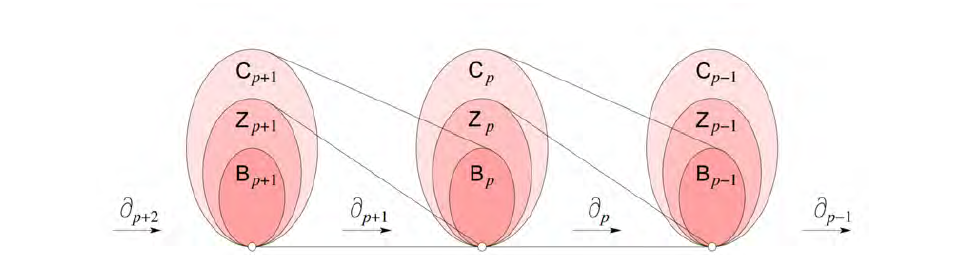

In [94]:
from IPython.display import Image
Image(filename='chain_complex.png')

# Filtration

Layman's term, a filtration of a simplicial complex is a process of building the complex step by step, starting with a small subcomplex and progressively adding simplices in a specified order.

Definition 5: Filtration of a simplicial complex
A filtration of a simplicial complex $K$ is a nested sequence of subcomplexes:
$$
\phi = K_0 \subseteq K_1 \subseteq K_2 ...\subseteq K_i \subseteq K_n = K
$$
where 
1. each $K_i$ is a simplicial complex
2. $K_{i+1}$ is obtained by adding at least 1 simplex to $K_i$

Example:
* Filtration by dimension
   1. $K_0$: Start with all 0-simplices (vertices).
   2. $K_1$:  Add all 1-simplices (edges) connecting the vertices.
   3. $K_2$: All all 2-simplices(triangle) formed the edges
   4. Add higher order dimension

# Vietoris-Rips filtration

Let's perform a filtration on Viltoris-Rips complex. Consider the following data:

In [3]:
import gudhi
import numpy as np
from scipy.spatial.distance import cdist

data = np.array([[1, 1], [7, 0], [4, 6], [9, 6], [0, 14], [2, 19], [9, 17]])

#compute distance matrix
print('Distance matrix:')
distance_matrix = cdist(data, data)
print(distance_matrix)

rips_complex = gudhi.RipsComplex(points = data, max_edge_length=11)

simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)  #max_dimension limits the highest simplex dimension

Distance matrix:
[[ 0.          6.08276253  5.83095189  9.43398113 13.03840481 18.02775638
  17.88854382]
 [ 6.08276253  0.          6.70820393  6.32455532 15.65247584 19.6468827
  17.11724277]
 [ 5.83095189  6.70820393  0.          5.          8.94427191 13.15294644
  12.08304597]
 [ 9.43398113  6.32455532  5.          0.         12.04159458 14.76482306
  11.        ]
 [13.03840481 15.65247584  8.94427191 12.04159458  0.          5.38516481
   9.48683298]
 [18.02775638 19.6468827  13.15294644 14.76482306  5.38516481  0.
   7.28010989]
 [17.88854382 17.11724277 12.08304597 11.          9.48683298  7.28010989
   0.        ]]


In [4]:
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)

Rips complex is of dimension 2 - 23 simplices - 7 vertices.


Let's visualize the filtration process on a graph. We select 3 filter values

In [6]:
filter1_para = 5
filter2_para = 8
filter3_para = 11

filter1_arr = []
filter2_arr = []
filter3_arr = []  #array simplices for different filter
print('Simplex : Filtration value (distance)')
for filtered_value in simplex_tree.get_filtration():
    print('%s : %.2f' % tuple(filtered_value))
    if filtered_value[1] <= filter1_para:
        filter1_arr.append(filtered_value)
        filter2_arr.append(filtered_value)
        filter3_arr.append(filtered_value)
    elif filtered_value[1] <= filter2_para and filtered_value[1] > filter1_para:
        filter2_arr.append(filtered_value)
        filter3_arr.append(filtered_value)        
    elif filtered_value[1] <= filter3_para and filtered_value[1] > filter2_para:
        filter3_arr.append(filtered_value) 

Simplex : Filtration value (distance)
[0] : 0.00
[1] : 0.00
[2] : 0.00
[3] : 0.00
[4] : 0.00
[5] : 0.00
[6] : 0.00
[2, 3] : 5.00
[4, 5] : 5.39
[0, 2] : 5.83
[0, 1] : 6.08
[1, 3] : 6.32
[1, 2] : 6.71
[0, 1, 2] : 6.71
[1, 2, 3] : 6.71
[5, 6] : 7.28
[2, 4] : 8.94
[0, 3] : 9.43
[0, 1, 3] : 9.43
[0, 2, 3] : 9.43
[4, 6] : 9.49
[4, 5, 6] : 9.49
[3, 6] : 11.00


[]


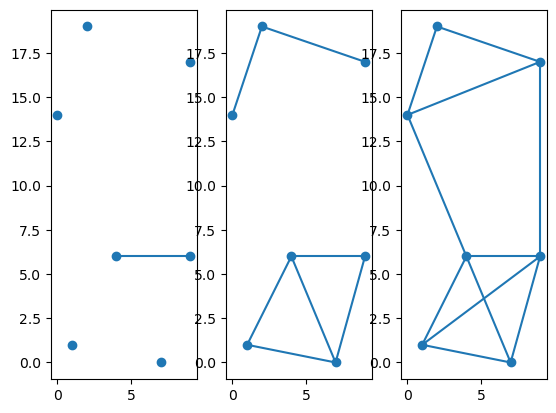

In [7]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

edge1 = []
tri1 = []
for s in filter1_arr:
    e = s[0]
    if len(e) == 2:
        #print(e)   # for debugging
        #print(data[e[0]])   # for debugging
        edge1.append([data[e[0]], data[e[1]]])
    if len(e) == 3:
        tri1.append(e)

edge2 = []
tri2 = []
for s in filter2_arr:
    e = s[0]
    if len(e) == 2:
        #print(e)   # for debugging
        #print(data[e[0]])   # for debugging
        edge2.append([data[e[0]], data[e[1]]])
    if len(e) == 3:
        tri2.append(e)


edge3 = []
tri3 = []
for s in filter3_arr:
    e = s[0]
    if len(e) == 2:
        #print(e)   # for debugging
        #print(data[e[0]])   # for debugging
        edge3.append([data[e[0]], data[e[1]]])
    if len(e) == 3:
        tri3.append(e)
        
print(tri1)

color = ['b' for i in range(len(tri2))]

fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
#ax1.title('Filtration value = 5.0')
ax1.plot(data[:,0], data[:,1], 'o') # vertices
ax1.add_collection(LineCollection(edge1)) #edges

ax2.plot(data[:,0], data[:,1], 'o') # vertices
ax2.add_collection(LineCollection(edge2)) # edges

ax3.plot(data[:,0], data[:,1], 'o') # vertices
ax3.add_collection(LineCollection(edge3)) # edges

Let's perform a simple persistence homology analysis. We first extract the persistence barcode of this simplicial complex through the function .persistence(). It returns a list, where each element in the list is a tuple (dim,(b,d)) where dim is a dimension, b is birth parameter and d is death parameter.

In [9]:
Barcode = simplex_tree.persistence()
for i in range(len(Barcode)):
    print(Barcode[i])

(1, (11.0, inf))
(1, (6.324555320336759, 6.708203932499369))
(0, (0.0, inf))
(0, (0.0, 8.94427190999916))
(0, (0.0, 7.280109889280518))
(0, (0.0, 6.082762530298219))
(0, (0.0, 5.830951894845301))
(0, (0.0, 5.385164807134504))
(0, (0.0, 5.0))


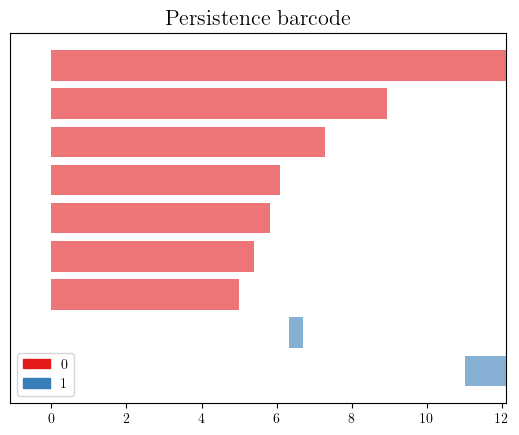

In [10]:
gudhi.plot_persistence_barcode(Barcode)
plt.show()